## Import necessary library

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Read and Import Dataset

In [3]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\AI\Data Analysis\Laptop Price Project\laptop_prices.csv')
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [5]:
data.Brand.value_counts()

Brand
Apple        1262
HP           1208
MSI          1190
Microsoft    1175
Dell         1170
Asus         1165
Acer         1165
Samsung      1163
Lenovo       1145
Razer        1125
Name: count, dtype: int64

In [6]:
data.Brand.nunique()

10

<Axes: xlabel='Brand'>

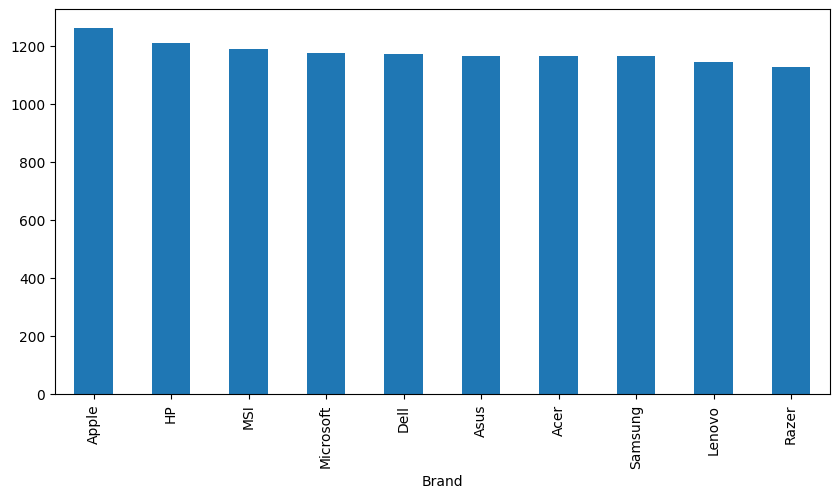

In [7]:
data['Brand'].value_counts().plot(kind='bar', figsize=(10,5))

In [8]:
data.Processor.value_counts()

Processor
Intel i3       1570
Intel i7       1509
AMD Ryzen 3    1500
AMD Ryzen 9    1472
Intel i9       1456
Intel i5       1429
AMD Ryzen 5    1422
AMD Ryzen 7    1410
Name: count, dtype: int64

In [9]:
data.Processor.nunique()

8

<Axes: xlabel='Processor'>

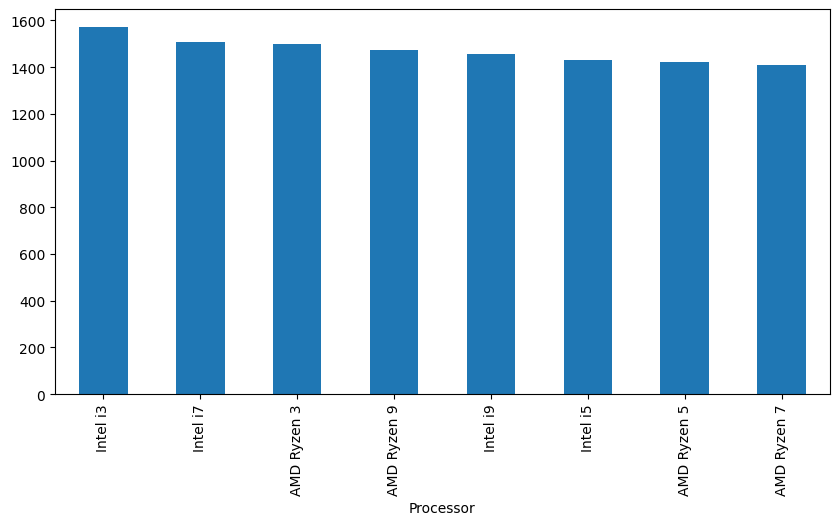

In [10]:
data['Processor'].value_counts().plot(kind='bar', figsize=(10,5))

In [11]:
data['RAM (GB)'].value_counts()

RAM (GB)
32    2410
4     2361
16    2361
64    2340
8     2296
Name: count, dtype: int64

<Axes: xlabel='RAM (GB)'>

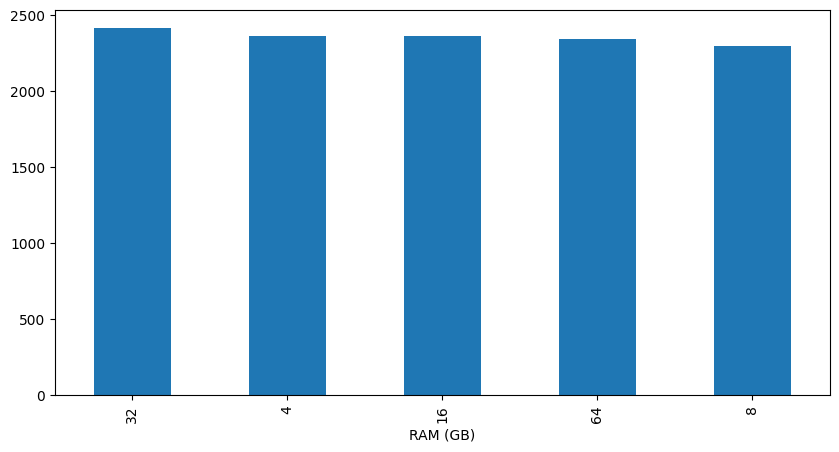

In [12]:
data['RAM (GB)'].value_counts().plot(kind='bar', figsize=(10,5))

In [13]:
data.Storage.value_counts()

Storage
512GB SSD    2420
2TB SSD      2415
256GB SSD    2318
1TB SSD      2313
1TB HDD      2302
Name: count, dtype: int64

In [14]:
data.Storage.dtype

dtype('O')

In [15]:
def convert_storage_to_gb(storage):
    match = re.match(r'(\d+)(TB|GB)', storage)
    if match:
        size, unit = match.groups()
        size = int(size)
        if unit == 'TB':
            size *= 1024
        return size
    return None

In [16]:
data['Storage Size (GB)'] = data['Storage'].apply(convert_storage_to_gb)
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage Size (GB)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256


In [17]:
def convert_storage_type(storage):
    if 'SSD' in storage:
        return 'SSD'
    if 'HDD' in storage:
        return 'HDD'
    return None

In [18]:
data['Type'] = data['Storage'].apply(convert_storage_type)
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage Size (GB),Type
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD


In [19]:
data.drop(columns='Storage',axis=1,inplace=True)

In [20]:
data.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($),Storage Size (GB),Type
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07,512,SSD
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78,1024,SSD
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07,2048,SSD
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17,256,SSD
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83,256,SSD


In [21]:
pd.crosstab(data['Brand'], data['Type'])

Type,HDD,SSD
Brand,,
Acer,224,941
Apple,267,995
Asus,240,925
Dell,214,956
HP,237,971
Lenovo,226,919
MSI,252,938
Microsoft,220,955
Razer,207,918


<Axes: xlabel='Type'>

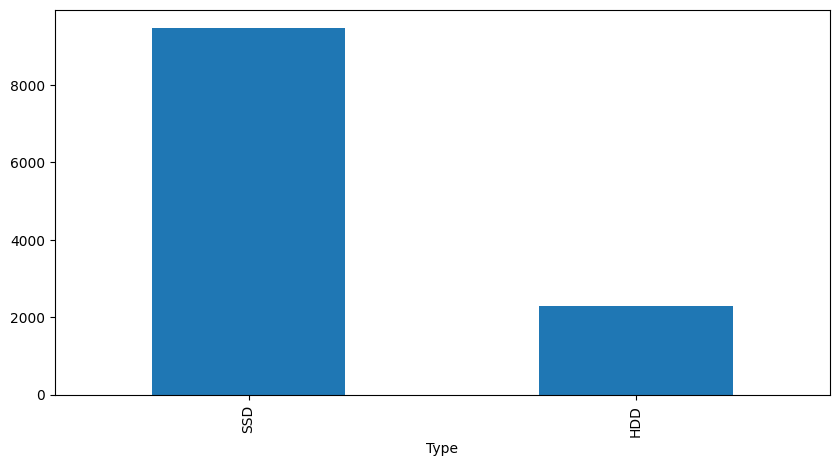

In [22]:
data['Type'].value_counts().plot(kind='bar', figsize=(10,5))

<Axes: xlabel='Brand'>

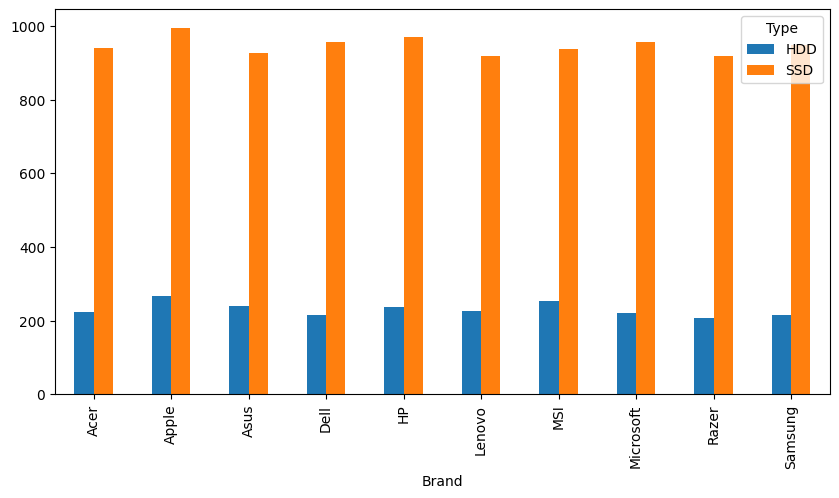

In [23]:
pd.crosstab(data['Brand'], data['Type']).plot(kind='bar', figsize=(10,5))

In [24]:
data.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)

Brand
Apple        2915.364279
Razer        2695.213804
MSI          2517.552227
Lenovo       1978.465790
Microsoft    1975.203549
Dell         1972.270222
Samsung      1959.007248
HP           1938.518733
Asus         1927.315142
Acer         1914.108515
Name: Price ($), dtype: float64

<Axes: xlabel='Brand'>

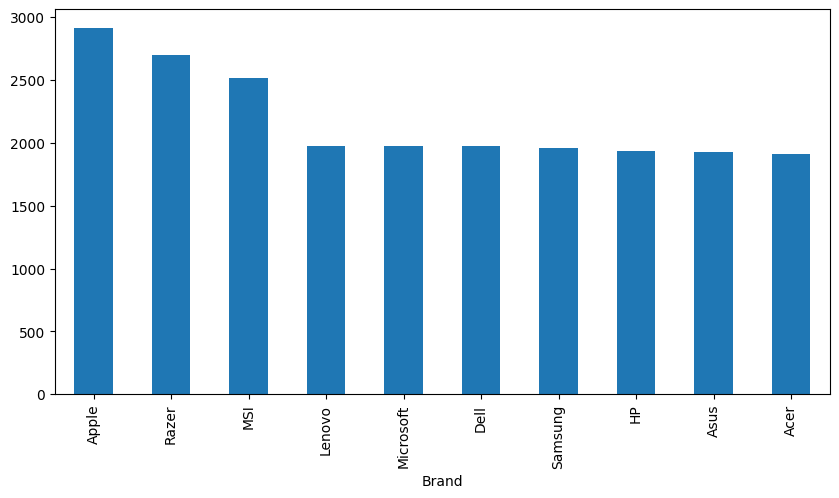

In [25]:
data.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [26]:
data.groupby('RAM (GB)')['Price ($)'].mean().sort_values(ascending=False)

RAM (GB)
64    3625.575197
32    2486.663017
16    1855.332740
8     1551.721969
4     1387.705468
Name: Price ($), dtype: float64

<Axes: xlabel='RAM (GB)'>

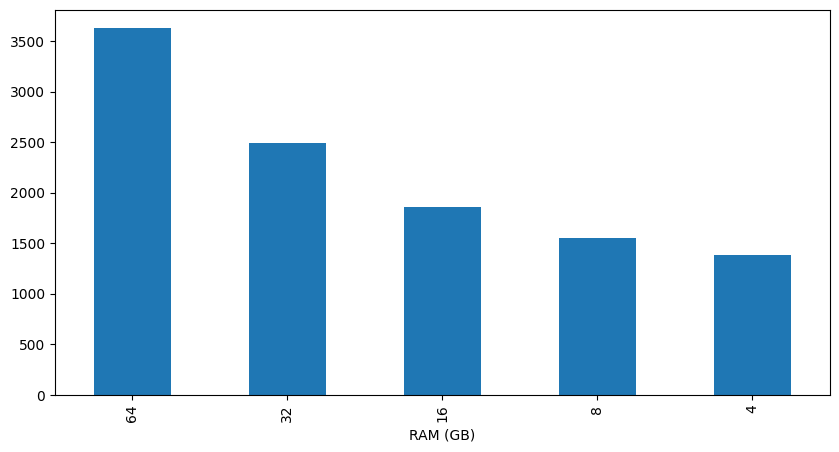

In [27]:
data.groupby('RAM (GB)')['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [28]:
data.groupby('Processor')['Price ($)'].mean().sort_values(ascending=False)

Processor
Intel i9       3084.511834
AMD Ryzen 9    3067.286753
Intel i7       2300.938979
AMD Ryzen 7    2277.774418
AMD Ryzen 5    1862.017925
Intel i5       1829.125983
Intel i3       1555.673013
AMD Ryzen 3    1534.919567
Name: Price ($), dtype: float64

<Axes: xlabel='Processor'>

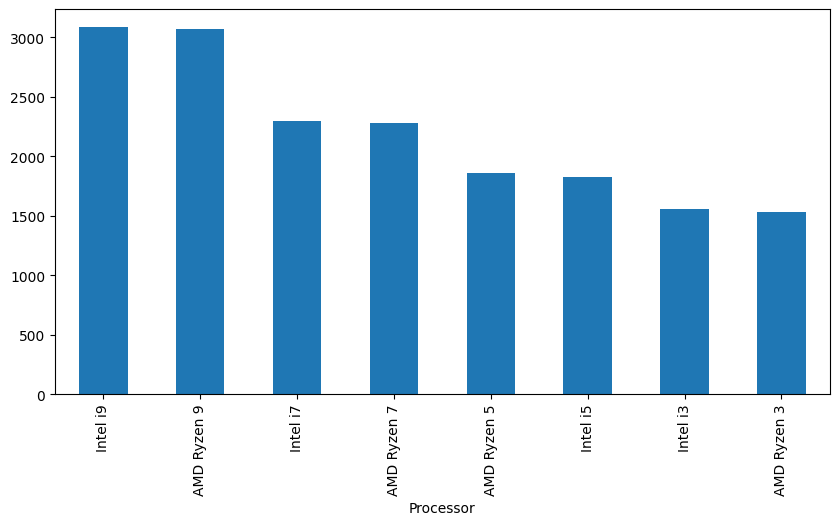

In [29]:
data.groupby('Processor')['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [30]:
data.groupby('Type')['Price ($)'].mean().sort_values(ascending=False)

Type
SSD    2250.253344
HDD    1909.371212
Name: Price ($), dtype: float64

<Axes: xlabel='Type'>

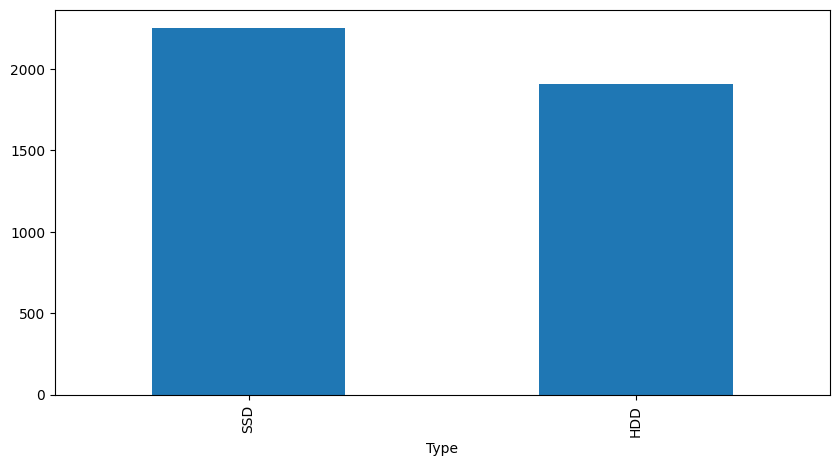

In [31]:
data.groupby('Type')['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [32]:
data['Weight (kg)'].value_counts()

Weight (kg)
3.40    74
2.55    72
1.85    72
3.43    69
1.67    68
        ..
1.88    37
2.18    34
1.20    27
3.00    25
3.50    24
Name: count, Length: 231, dtype: int64

In [33]:
data.groupby('Weight (kg)')['Price ($)'].mean().sort_values(ascending=False)

Weight (kg)
2.77    2836.654082
1.65    2771.258889
2.12    2719.759333
1.72    2606.982963
1.54    2601.746071
           ...     
3.01    1818.609545
2.84    1796.427455
2.20    1737.387021
2.71    1667.192083
1.92    1642.770976
Name: Price ($), Length: 231, dtype: float64

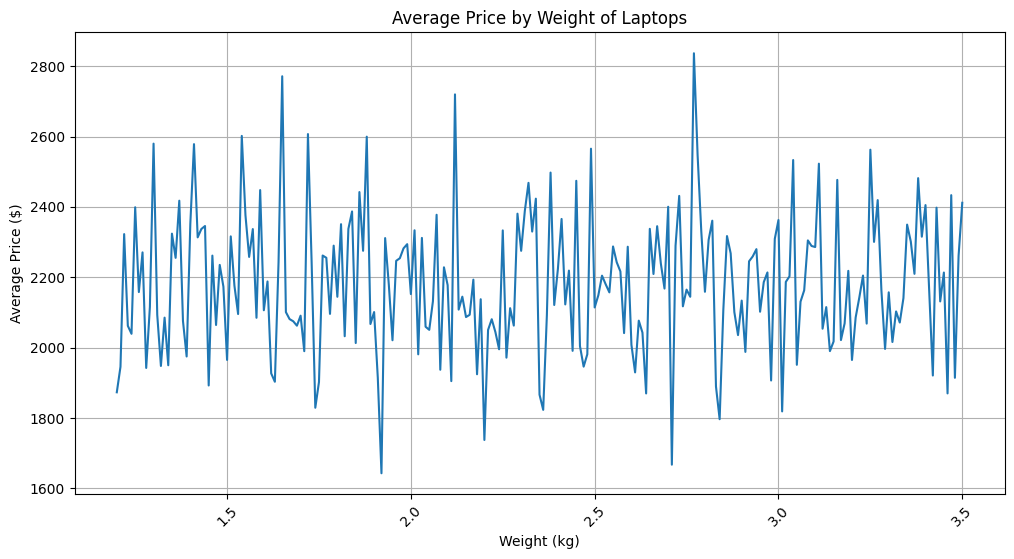

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average price by weight
average_price_by_weight = data.groupby('Weight (kg)')['Price ($)'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_price_by_weight.index, y=average_price_by_weight.values)
plt.title('Average Price by Weight of Laptops')
plt.xlabel('Weight (kg)')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [35]:
data['Weight (kg)'].min()

1.2

In [36]:
data['Weight (kg)'].max()

3.5

In [38]:
data.groupby('RAM (GB)')['Weight (kg)'].mean()

RAM (GB)
4     2.355553
8     2.337692
16    2.337027
32    2.330124
64    2.345359
Name: Weight (kg), dtype: float64

<Axes: xlabel='RAM (GB)'>

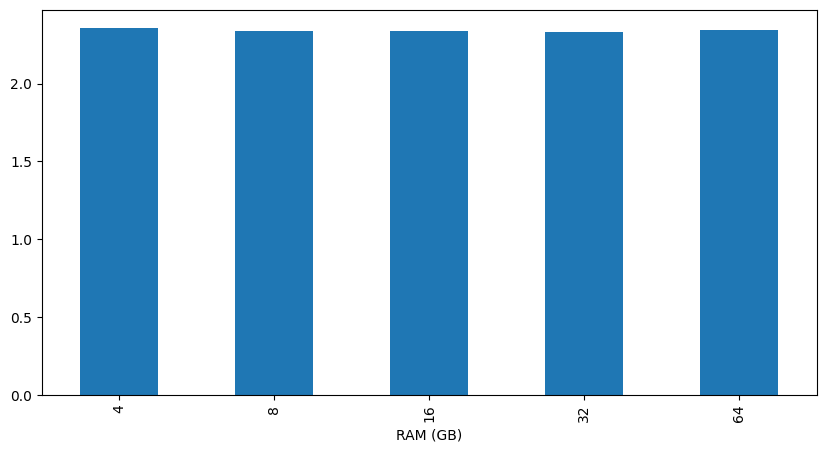

In [39]:
data.groupby('RAM (GB)')['Weight (kg)'].mean().plot(kind='bar', figsize=(10,5))

In [40]:
data.groupby('Processor')['Weight (kg)'].mean()

Processor
AMD Ryzen 3    2.339433
AMD Ryzen 5    2.341519
AMD Ryzen 7    2.352206
AMD Ryzen 9    2.357751
Intel i3       2.328172
Intel i5       2.335591
Intel i7       2.331226
Intel i9       2.344533
Name: Weight (kg), dtype: float64

<Axes: xlabel='Processor'>

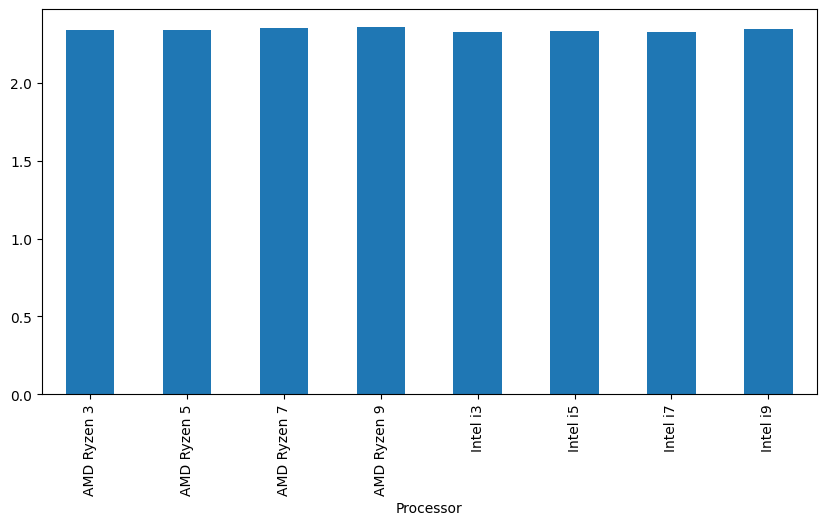

In [41]:
data.groupby('Processor')['Weight (kg)'].mean().plot(kind='bar', figsize=(10,5))

In [42]:
data.groupby('Screen Size (inch)')['Weight (kg)'].mean()

Screen Size (inch)
13.3    2.341545
14.0    2.356578
15.6    2.356422
16.0    2.336258
17.3    2.313907
Name: Weight (kg), dtype: float64

In [43]:
data['Battery Life (hours)'].value_counts()

Battery Life (hours)
11.3    175
7.5     174
10.7    173
8.9     170
10.9    169
       ... 
4.4     127
9.1     120
4.8     110
12.0     71
4.0      71
Name: count, Length: 81, dtype: int64

In [44]:
data.groupby('Battery Life (hours)')['Weight (kg)'].mean()

Battery Life (hours)
4.0     2.356056
4.1     2.307134
4.2     2.289720
4.3     2.320217
4.4     2.427402
          ...   
11.6    2.382654
11.7    2.378832
11.8    2.305278
11.9    2.359716
12.0    2.539155
Name: Weight (kg), Length: 81, dtype: float64

In [76]:
data.groupby('Battery Life (hours)')['Price ($)'].mean()

Battery Life (hours)
4.0     2129.695352
4.1     2049.070318
4.2     2213.201958
4.3     2218.957101
4.4     2015.706063
           ...     
11.6    2167.783148
11.7    2270.999927
11.8    2252.264028
11.9    2311.526241
12.0    2254.186901
Name: Price ($), Length: 81, dtype: float64

In [47]:
pd.crosstab(data['Brand'],data['Operating System'])

Operating System,FreeDOS,Linux,Windows,macOS
Brand,,,,
Acer,298,302,273,292
Apple,331,332,300,299
Asus,292,294,301,278
Dell,273,301,300,296
HP,316,282,316,294
Lenovo,262,269,296,318
MSI,319,297,306,268
Microsoft,287,299,312,277
Razer,275,289,261,300


<Axes: xlabel='Brand'>

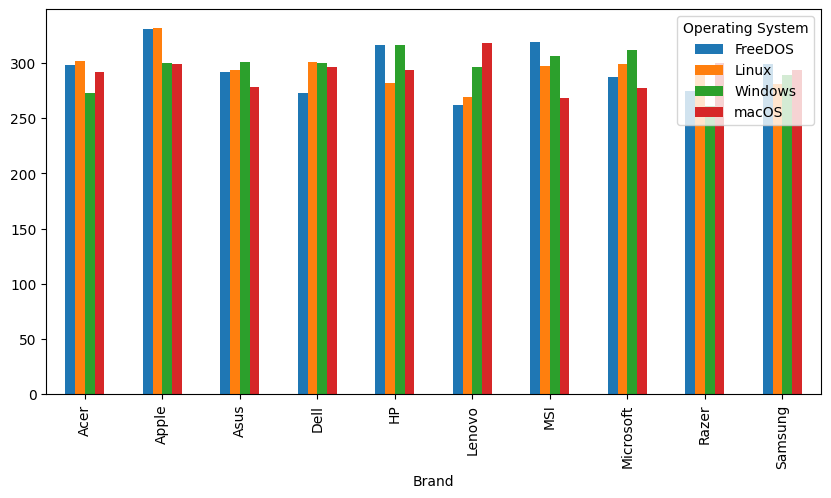

In [48]:
pd.crosstab(data['Brand'],data['Operating System']).plot(kind='bar', figsize=(10,5))

In [52]:
data.groupby('Operating System')['Price ($)'].sum().sort_values(ascending=False)

Operating System
FreeDOS    6464731.81
Windows    6442717.58
Linux      6418575.80
macOS      6370245.49
Name: Price ($), dtype: float64

In [54]:
data.groupby('Battery Life (hours)')['Price ($)'].mean()

Battery Life (hours)
4.0     2129.695352
4.1     2049.070318
4.2     2213.201958
4.3     2218.957101
4.4     2015.706063
           ...     
11.6    2167.783148
11.7    2270.999927
11.8    2252.264028
11.9    2311.526241
12.0    2254.186901
Name: Price ($), Length: 81, dtype: float64

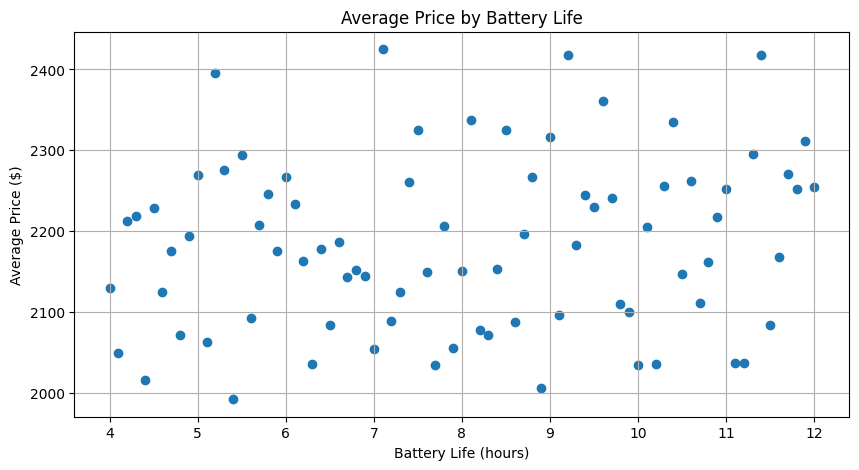

In [58]:
average_price_by_battery_life = data.groupby('Battery Life (hours)')['Price ($)'].mean()

plt.figure(figsize=(10, 5))
plt.scatter(average_price_by_battery_life.index, average_price_by_battery_life.values)
plt.title('Average Price by Battery Life')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

In [59]:
data.GPU.value_counts()

GPU
Nvidia RTX 2060       1746
Nvidia GTX 1650       1698
Nvidia RTX 3060       1679
AMD Radeon RX 6600    1676
AMD Radeon RX 6800    1669
Integrated            1653
Nvidia RTX 3080       1647
Name: count, dtype: int64

In [60]:
pd.crosstab(data['Brand'],data['GPU'])

GPU,AMD Radeon RX 6600,AMD Radeon RX 6800,Integrated,Nvidia GTX 1650,Nvidia RTX 2060,Nvidia RTX 3060,Nvidia RTX 3080
Brand,,,,,,,
Acer,161,169,163,177,180,148,167
Apple,172,175,179,179,176,190,191
Asus,165,165,181,143,195,161,155
Dell,156,156,173,176,185,158,166
HP,160,175,176,178,162,195,162
Lenovo,176,169,144,164,174,144,174
MSI,187,159,146,169,185,172,172
Microsoft,160,186,187,158,174,149,161
Razer,162,154,165,180,154,183,127


In [61]:
data.groupby('GPU')['Price ($)'].mean().sort_values(ascending=False)

GPU
Nvidia RTX 3060       2337.062001
AMD Radeon RX 6800    2319.744506
AMD Radeon RX 6600    2290.889069
Nvidia GTX 1650       2290.877444
Nvidia RTX 2060       2273.021833
Nvidia RTX 3080       2259.618349
Integrated            1500.884743
Name: Price ($), dtype: float64

<Axes: xlabel='GPU'>

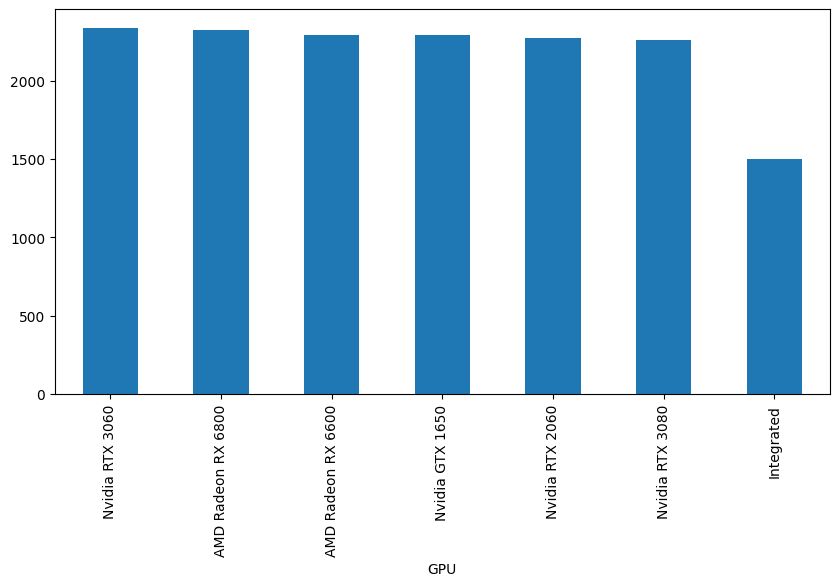

In [62]:
data.groupby('GPU')['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [66]:
data[['width','height']] = data['Resolution'].str.split('x',expand=True)
data['width'] = data['width'].astype(int)
data['height'] = data['height'].astype(int)
data.drop(columns='Resolution',axis=1,inplace=True)

In [67]:
data.head()

,Brand,Processor,RAM (GB),GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Storage Size (GB),Type,width,height
0,Apple,AMD Ryzen 3,64,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,512,SSD,2560,1440
1,Razer,AMD Ryzen 7,4,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1024,SSD,1366,768
2,Asus,Intel i5,32,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,2048,SSD,3840,2160
3,Lenovo,Intel i5,4,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,256,SSD,1366,768
4,Razer,Intel i3,4,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,256,SSD,3840,2160


In [68]:
data.groupby(['width','height'])['Price ($)'].mean().sort_values(ascending=False)

width  height
3840   2160      3017.422036
2560   1440      2294.514609
1920   1080      1878.658218
1366   768       1530.799253
Name: Price ($), dtype: float64

<Axes: xlabel='width,height'>

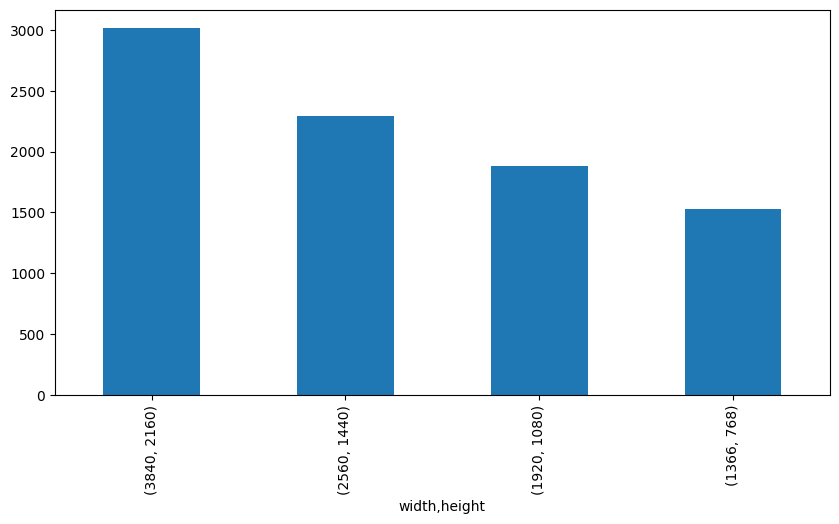

In [69]:
data.groupby(['width','height'])['Price ($)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [71]:
pd.crosstab(index=data['GPU'], columns=[data['width'], data['height']])

width,1366,1920,2560,3840
height,768,1080,1440,2160
GPU,,,,
AMD Radeon RX 6600,412,419,421,424
AMD Radeon RX 6800,435,401,393,440
Integrated,392,463,405,393
Nvidia GTX 1650,436,403,454,405
Nvidia RTX 2060,445,427,423,451
Nvidia RTX 3060,405,402,409,463
Nvidia RTX 3080,407,415,424,401


In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
correlation_matrix

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Storage Size (GB),width,height
RAM (GB),1.000000,0.007915,0.012470,-0.001716,0.616221,-0.033056,-0.011810,-0.011808
Screen Size (inch),0.007915,1.000000,0.008348,-0.015508,0.069829,0.002538,-0.000920,-0.000920
Battery Life (hours),0.012470,0.008348,1.000000,-0.001774,0.009778,-0.009171,-0.004990,-0.004990
Weight (kg),-0.001716,-0.015508,-0.001774,1.000000,0.002431,-0.002477,-0.001404,-0.001406
Price ($),0.616221,0.069829,0.009778,0.002431,1.000000,-0.016259,0.421392,0.421395
Storage Size (GB),-0.033056,0.002538,-0.009171,-0.002477,-0.016259,1.000000,0.001213,0.001212
width,-0.011810,-0.000920,-0.004990,-0.001404,0.421392,0.001213,1.000000,1.000000
height,-0.011808,-0.000920,-0.004990,-0.001406,0.421395,0.001212,1.000000,1.000000


<Axes: >

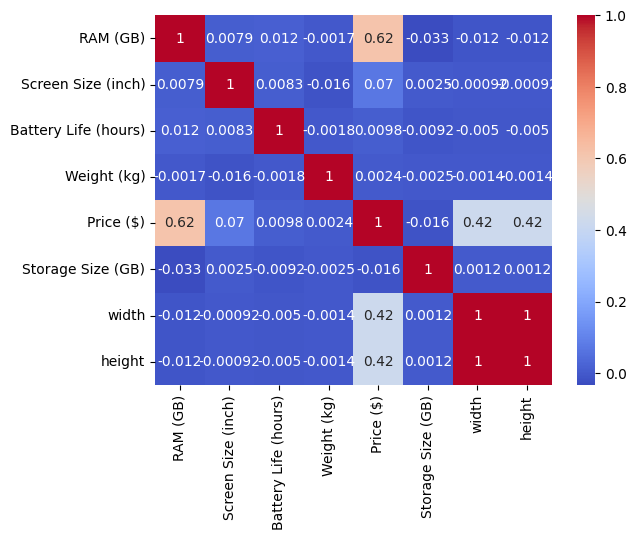

In [74]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

# Laptop Data Analysis Report

## Introduction
This report aims to analyze laptop price data and explore the factors influencing prices, such as the processor, RAM size, screen size, battery life, GPU, operating system, and other specifications. The analysis includes statistical distributions, variable relationships, and correlations between different features.

---

## **1. Analysis of Average Prices Based on Different Specifications**

### **Processor and Its Impact on Price**
The analysis showed that **Intel i9** and **AMD Ryzen 9** processors have the highest average prices, with values as follows:

- **Intel i9:** $3084.51  
- **AMD Ryzen 9:** $3067.28  
- **Intel i7:** $2300.93  
- **AMD Ryzen 7:** $2277.77  
- **AMD Ryzen 3:** $1534.91 (lowest price)  

This indicates that laptops with i9 and Ryzen 9 processors target high-end users, such as professionals and content creators.

### **Storage Type and Its Impact on Price**
Laptops with **SSD** storage are more expensive than those with **HDD**, with average prices:

- **SSD:** $2250.25  
- **HDD:** $1909.37  

This confirms that SSD performance and speed play a crucial role in determining price.

### **Weight vs. Price**
When analyzing the average price by weight, it was observed that **heavier devices tend to be more expensive**. For example:

- Laptops weighing **2.77 kg** have an average price of **$2836.65**  
- Laptops weighing **1.92 kg** have an average price of **$1642.77** (lowest)  

This suggests that heavier devices are often equipped with powerful components, such as larger battery capacities or better cooling systems.

### **Operating System and Its Impact on Price**
When comparing prices based on the operating system, the results were:

- **FreeDOS:** $2189.94  
- **macOS:** $2184.58  
- **Windows:** $2181.01  
- **Linux:** $2178.74  

It is noticeable that **macOS and FreeDOS laptops are the most expensive**, while Linux laptops have the lowest average price.

### **GPU and Its Impact on Price**
The analysis of the impact of GPUs on price showed that **Nvidia RTX 3060** has the highest average price among graphics processors:

- **Nvidia RTX 3060:** $2337.06  
- **AMD Radeon RX 6800:** $2319.74  
- **AMD Radeon RX 6600:** $2290.88  
- **Integrated GPU:** $1500.88 (lowest price)  

Laptops with integrated GPUs are the cheapest, indicating that they are targeted at general users rather than gamers or creative professionals.

---

## **2. Analysis of Relationships Between Variables**

### **Correlation Analysis Between Numerical Variables**
The relationship between different variables was analyzed using a **Correlation Matrix**, and the results showed:

- **The highest correlation was between price and RAM size (0.62)**, meaning that increasing RAM size generally leads to a higher price.
- A slight correlation exists between **price and screen dimensions (Width, Height)** of about 0.42, indicating that **larger screen devices tend to be more expensive.**
- There was no strong correlation between **device weight and price**, meaning that weight is not a decisive factor in determining price.

---

## **3. Interactive Analysis Between Features**

### **Brand vs. Operating System**
The analysis using **Cross Tabulation (crosstab)** showed a significant variation in the number of devices running each operating system. For example:

- **Apple** only has devices running **macOS**.
- Other brands such as **Lenovo, Dell, and HP** provide more variety between Windows, Linux, and FreeDOS.

### **Screen Resolution vs. GPU**
The relationship between screen resolution and GPUs was analyzed, revealing that laptops equipped with **Nvidia RTX 3060 and Nvidia RTX 3080** support **4K resolution (3840x2160)** more frequently than those with integrated GPUs.

---

## **4. Recommendations and Conclusions**

Based on the previous analysis, we can draw some key recommendations:

1. **If you are looking for a high-performance laptop**, devices equipped with **Intel i9 or AMD Ryzen 9 and Nvidia RTX 3060 GPU** are the best choice.
2. **If you are concerned about price-to-performance ratio**, laptops with **AMD Ryzen 5 or Intel i5** provide a good balance between performance and cost.
3. **If you need a fast-performing device**, opt for **SSD instead of HDD**, as SSD-equipped devices are more expensive but offer superior performance.
4. **If you are a graphic designer or video editor**, it is best to choose a laptop with a **large screen and high resolution with a dedicated GPU** like **Nvidia RTX 3060 or AMD Radeon RX 6800**.
5. **If you need a long-lasting battery**, choose a **lighter device with a higher battery capacity**, as data showed that higher battery capacity does not necessarily mean higher prices but is more aligned with lightweight devices.

---

## **Future Analysis Steps**
To improve the understanding further, additional analyses can be performed, including:

- **Classification analysis using machine learning models** to predict laptop prices based on specifications.
- **Analyzing the impact of other factors such as brand (Brand) on price**.
- **Comparing prices by year (if the dataset contains release dates)** to observe price trends over time.

---